In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as k

# to see the data plotted
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hyperparameters + load data

# do not change unless train data changes
num_classes = 10

batch_size = 64
epochs = 24
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
model_path = 'model_param'

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# reshape data
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [4]:
# convert type + scale train/val data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print(f"x train shape: {x_train.shape}")
print(f"x test shape: {x_test.shape}")
print(y_train[0:3])

x train shape: (60000, 28, 28, 1)
x test shape: (10000, 28, 28, 1)
[9 0 0]


In [5]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print(y_train[0:2]) # verify encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# MODEL CODE STARTS HERE

In [12]:
# load model or create CNN
try:
  model = load_model(model_path)
  print("Model loaded successfully")
except IOError as e:
  # define model
  model = Sequential()
  model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = 'softmax'))
  # define compile to minimize categorical loss, ada delta optimized, optimize to ensure max efficiency
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.AdamW(), metrics = ['accuracy']) # change optimizer to adam if problems occur
except Exception as e:
  print(f"Other exception encountered: {e}")

Model loaded successfully


In [13]:
# train model and val the model after each epoch
# return history of loss/accuracy per epoch
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))
model.save(model_path)

Epoch 1/24
938/938 [==============================] - 41s 42ms/step - loss: 0.0987 - accuracy: 0.9623 - val_loss: 0.3970 - val_accuracy: 0.9091
Epoch 2/24
938/938 [==============================] - 39s 42ms/step - loss: 0.0899 - accuracy: 0.9642 - val_loss: 0.3872 - val_accuracy: 0.9112
Epoch 3/24
938/938 [==============================] - 39s 42ms/step - loss: 0.0886 - accuracy: 0.9666 - val_loss: 0.4216 - val_accuracy: 0.9056
Epoch 4/24
938/938 [==============================] - 39s 41ms/step - loss: 0.0875 - accuracy: 0.9667 - val_loss: 0.3966 - val_accuracy: 0.9086
Epoch 5/24
938/938 [==============================] - 39s 41ms/step - loss: 0.0800 - accuracy: 0.9696 - val_loss: 0.4511 - val_accuracy: 0.9037
Epoch 6/24
938/938 [==============================] - 39s 41ms/step - loss: 0.0745 - accuracy: 0.9722 - val_loss: 0.4342 - val_accuracy: 0.9062
Epoch 7/24
938/938 [==============================] - 39s 42ms/step - loss: 0.0796 - accuracy: 0.9699 - val_loss: 0.4511 - val_accuracy:

Test loss: 0.6304800510406494
Test accuracy: 0.9060999751091003


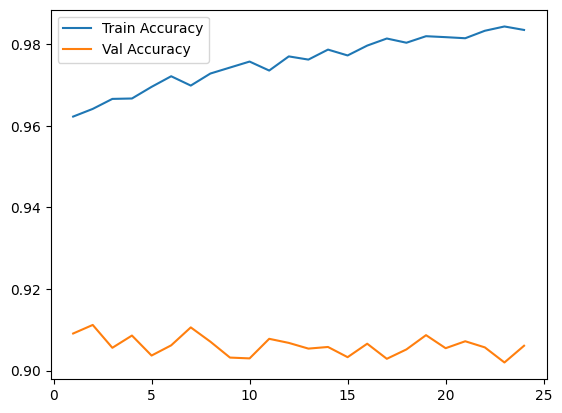

In [14]:
# evaluate model with test data to get metrics on real data
score = model.evaluate(x_test, y_test, verbose = 0)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}")

%matplotlib inline
epoch_list = list(range(1, len(hist.history['accuracy']) + 1)) # x axis
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Train Accuracy', 'Val Accuracy'))
plt.show()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0